# DATA COLLECTION AND PREPROCESSING

# Loading the Dataset and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define column names
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Load the dataset with spaces as the delimiter
housing_data = pd.read_csv('housing.csv', sep=r'\s+', header=None, names=column_names)

# Display the first few rows of the dataset
print(housing_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Observation:
The dataset has been successfully loaded with columns representing various housing attributes and median values (MEDV).
No apparent errors in the initial data loading step.

Insight:
This step ensures that the dataset is correctly imported and the column names are properly assigned.


# Dataset Summary

In [2]:
housing_data.info() #summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Observation:
The dataset contains 506 rows and 14 columns.
All columns are non-null.

Insight:
The dataset is complete initially but will require handling missing values, as indicated by the next steps.

# Checking for Missing Values

In [3]:
#check for missing values
housing_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
housing_data.replace(0, np.nan, inplace=True)
# Summary of missing values by column
missing_summary = housing_data.isnull().sum()
print("\nMissing values by column:\n", missing_summary)

# Percentage of missing values by column
missing_percentage = (housing_data.isnull().sum() / len(housing_data)) * 100
print("\nPercentage of missing values by column:\n", missing_percentage)


Missing values by column:
 CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

Percentage of missing values by column:
 CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
MEDV        0.000000
dtype: float64


Observation:
Missing values are found in the ZN and CHAS columns.
ZN has 73.52% missing values and CHAS has 93.08% missing values.

Insight:
Replacing zeros with NaN allows for more accurate handling of missing values. This step is crucial before performing any imputation.


# Imputing Missing Values

In [5]:
# Calculate the median of each column
median_values = housing_data.median()

# Replace NaN values with the median of each column
df_filled = housing_data.fillna(median_values)

print("Original DataFrame:\n", housing_data)
print("\nDataFrame with NaNs replaced by median values:\n", df_filled)

Original DataFrame:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   NaN  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   NaN   7.07   NaN  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   NaN   7.07   NaN  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   NaN   2.18   NaN  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   NaN   2.18   NaN  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   NaN  11.93   NaN  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   NaN  11.93   NaN  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   NaN  11.93   NaN  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   NaN  11.93   NaN  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   NaN  11.93   NaN  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1     

Observation:
Missing values are replaced with the median of each column.
ZN and CHAS values are now filled in the dataset.

Insight:
Using median imputation is a common technique for handling missing values, especially when dealing with numerical data.


# Visualizing Outliers

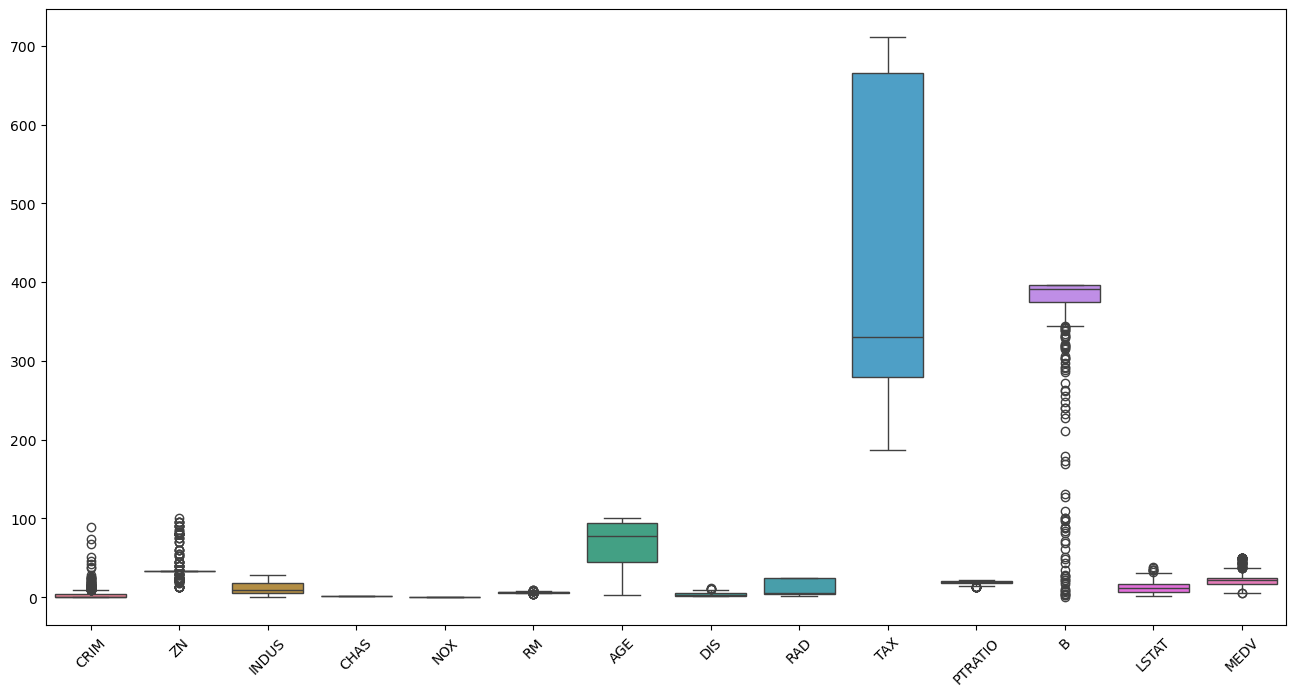

In [6]:
#outlier detection

# Set the size of the plot
plt.figure(figsize=(16, 8))

# boxplot for each feature
sns.boxplot(data=df_filled)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

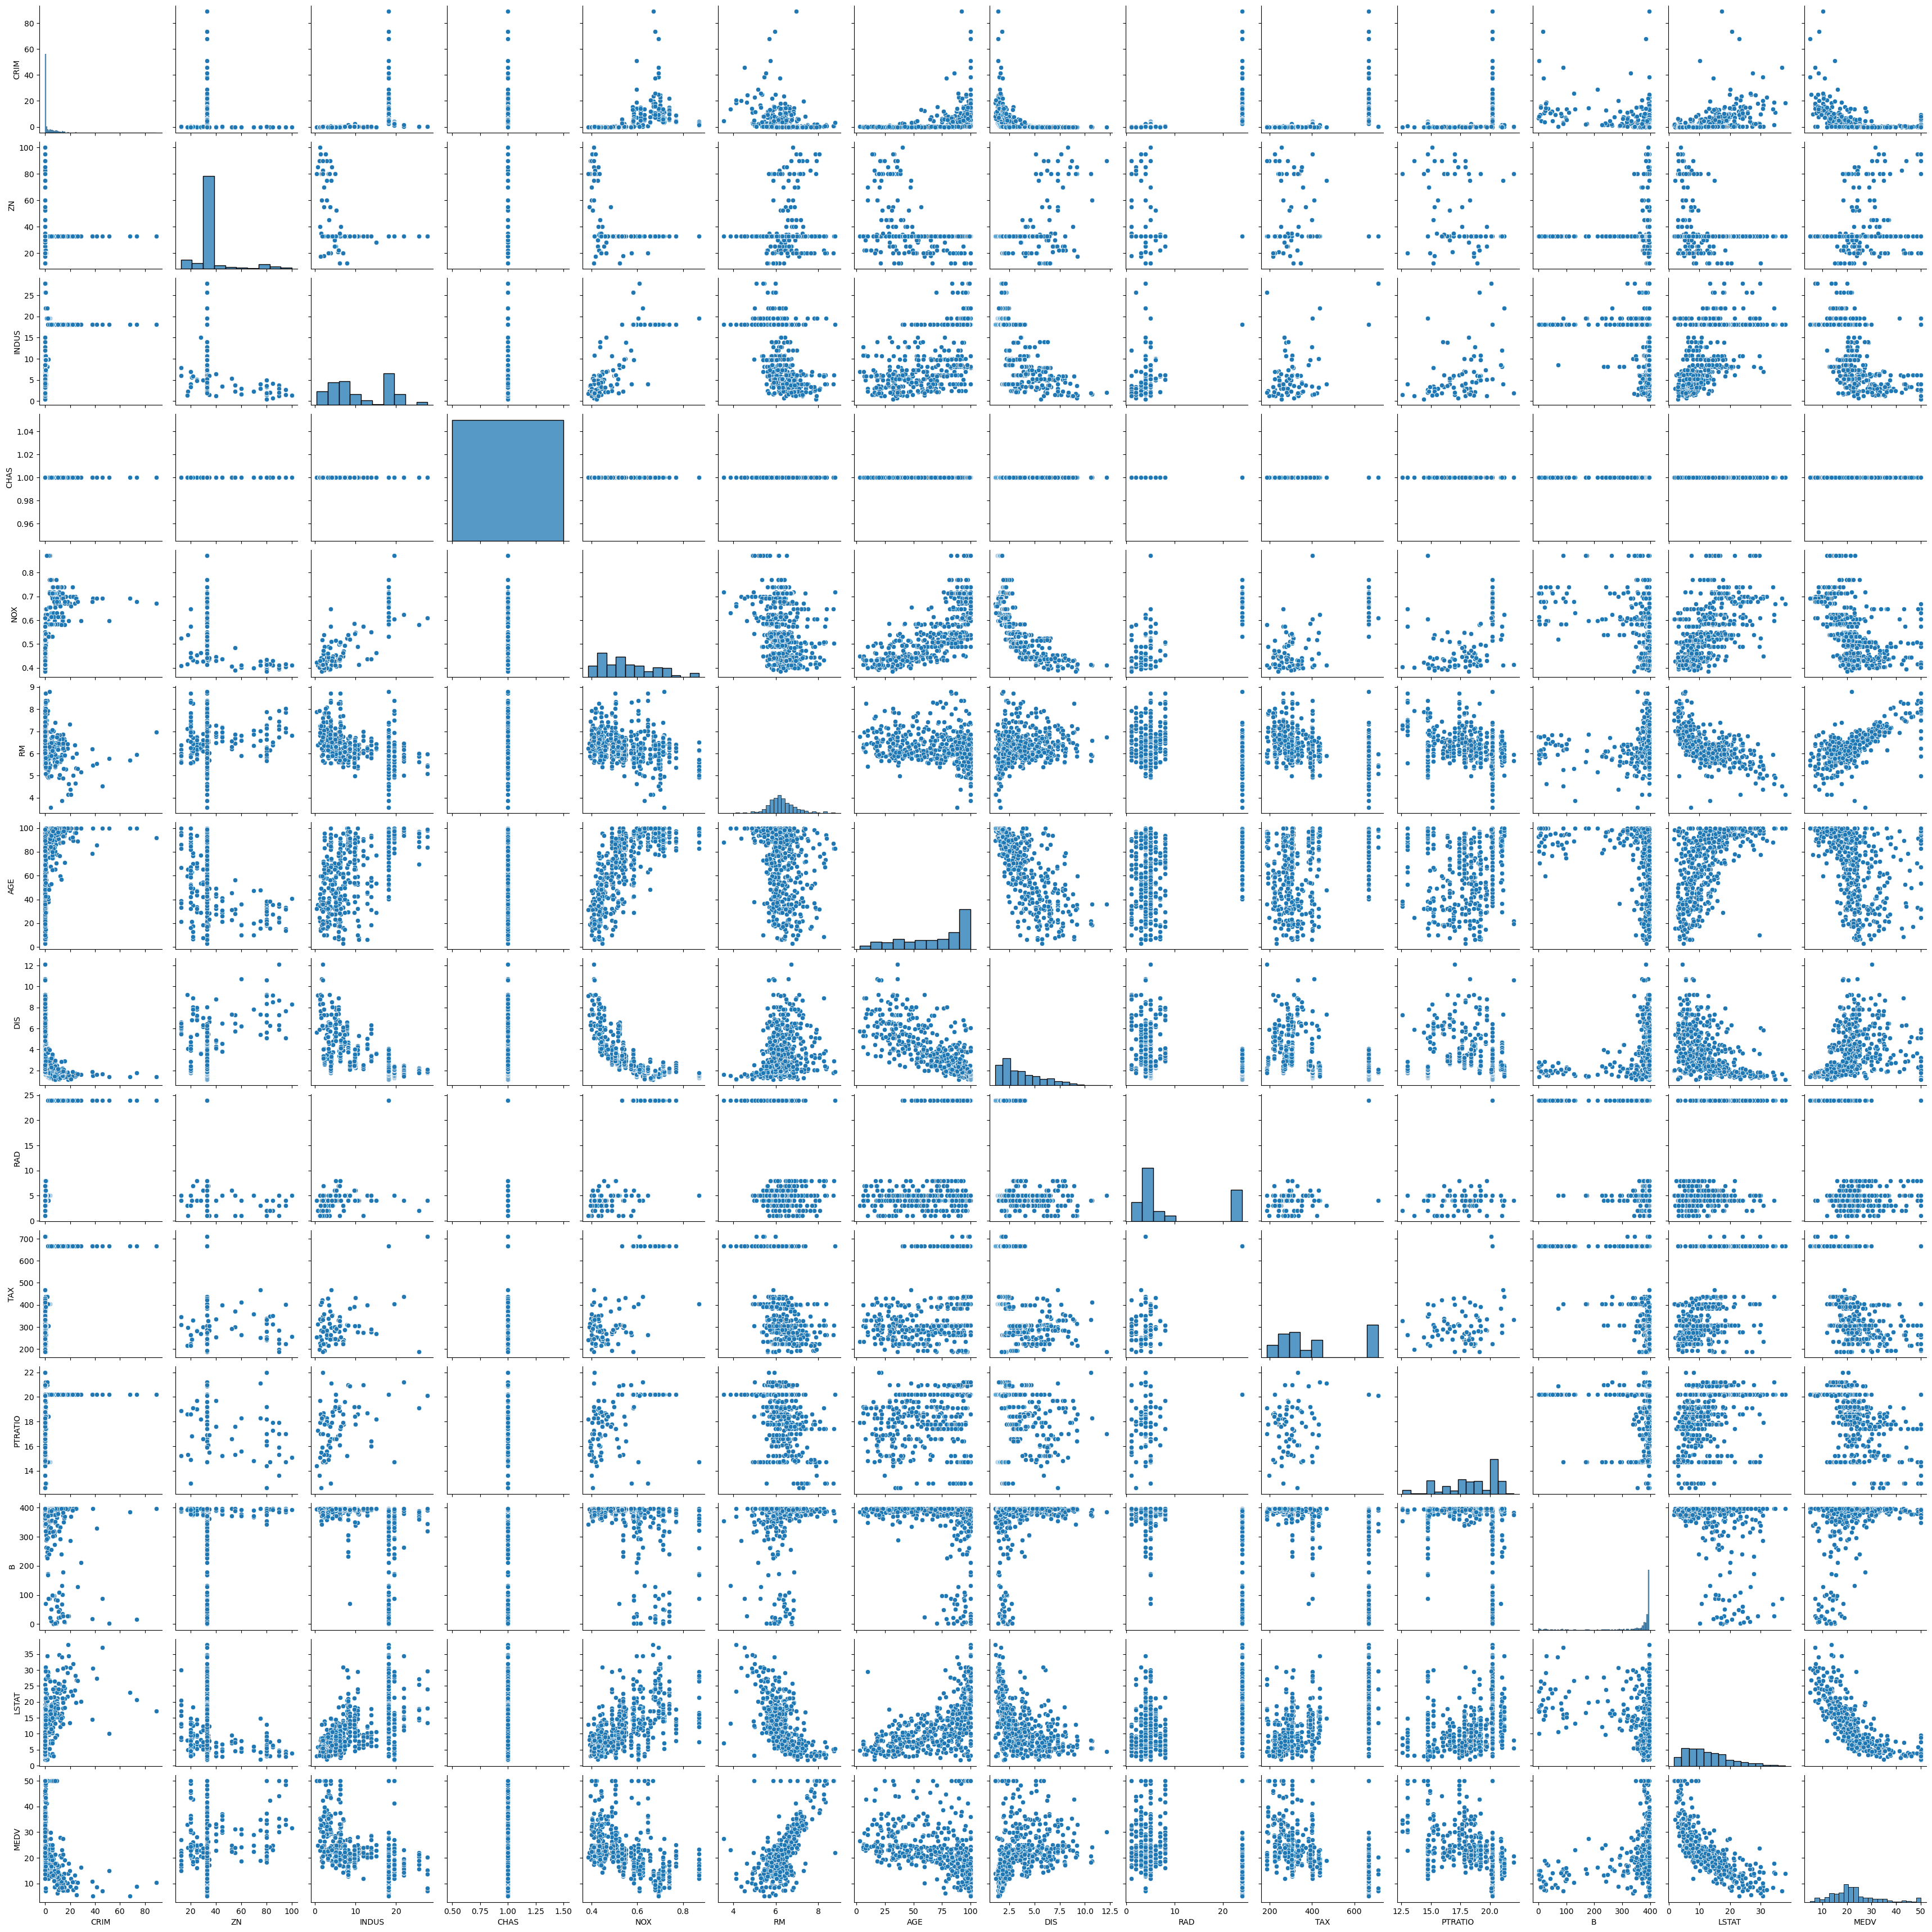

In [7]:
sns.pairplot(df_filled)

In [ ]:
Observation:
There are several outlliers present, which needs to be removed.

# Histograms for Each Feature

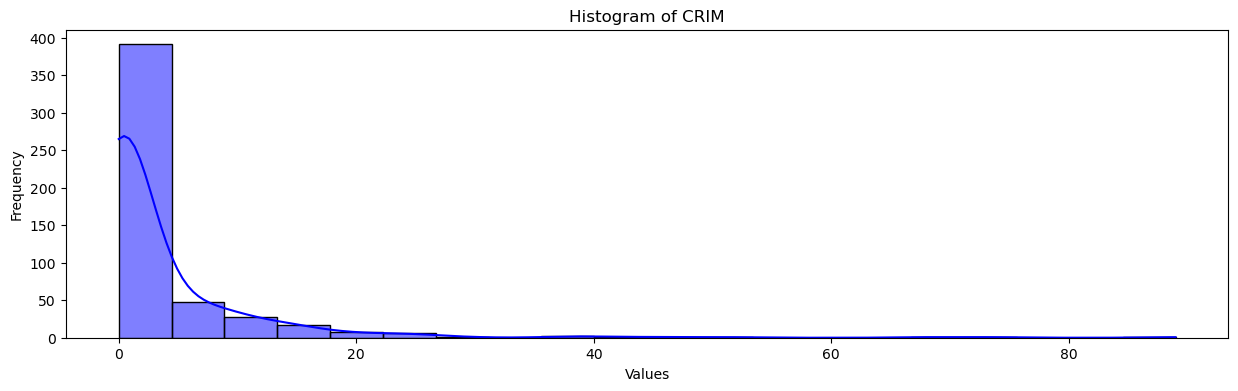

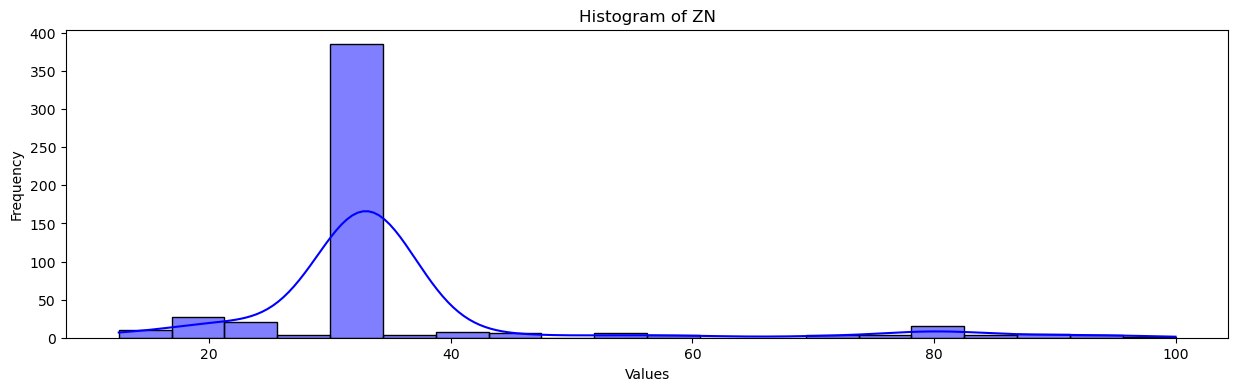

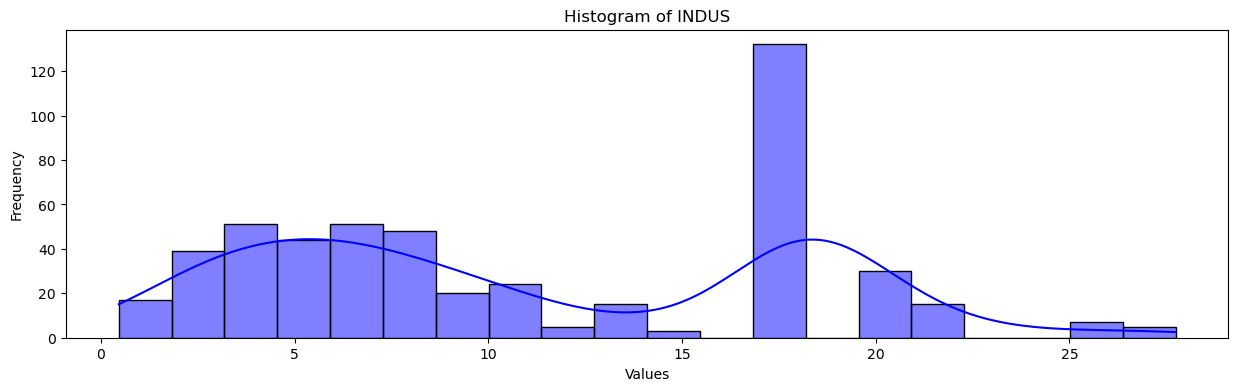

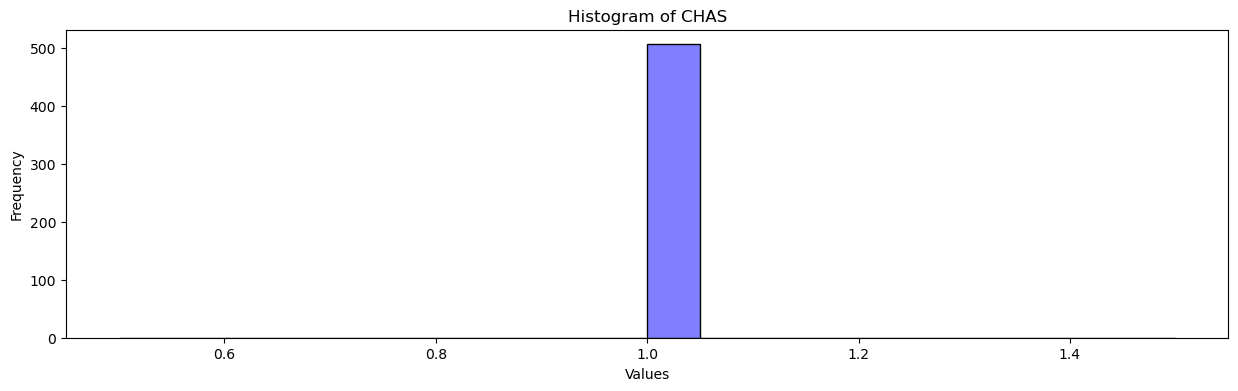

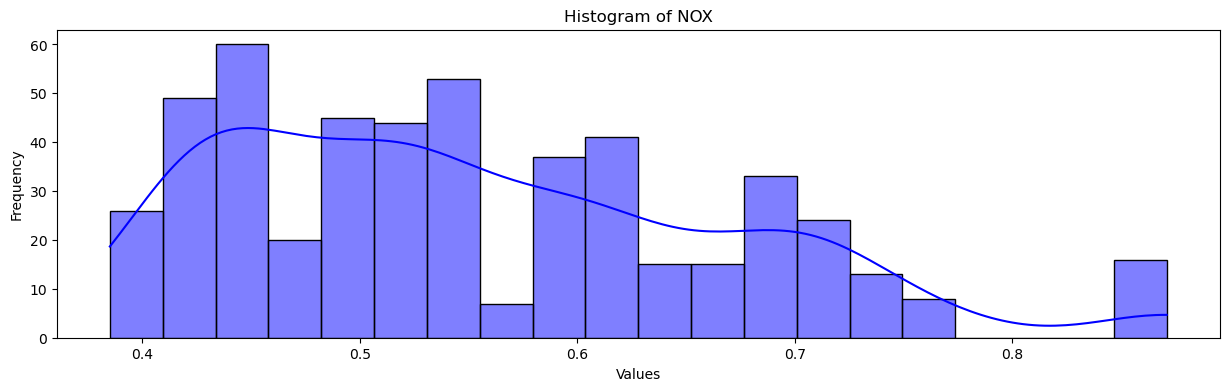

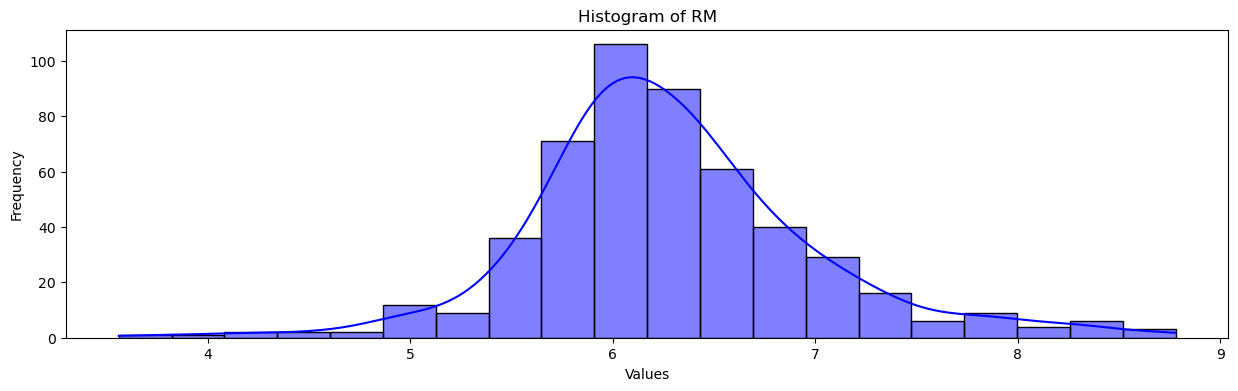

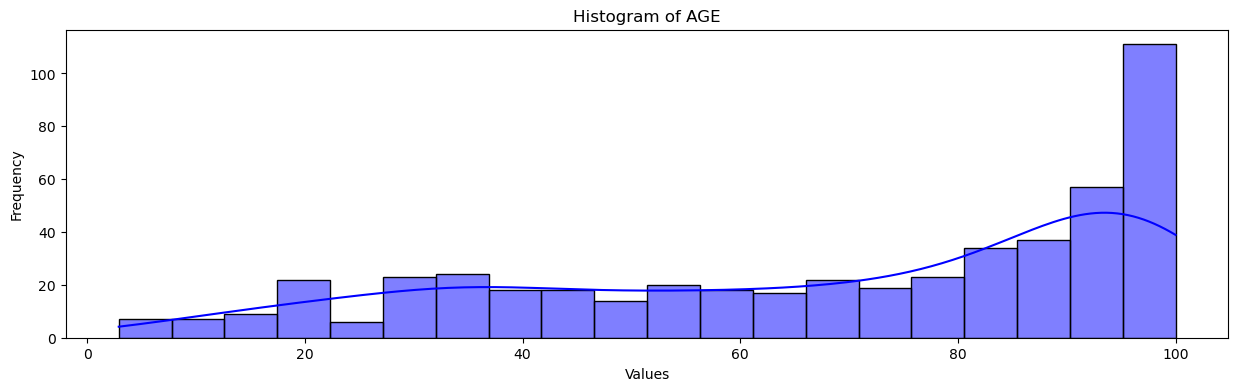

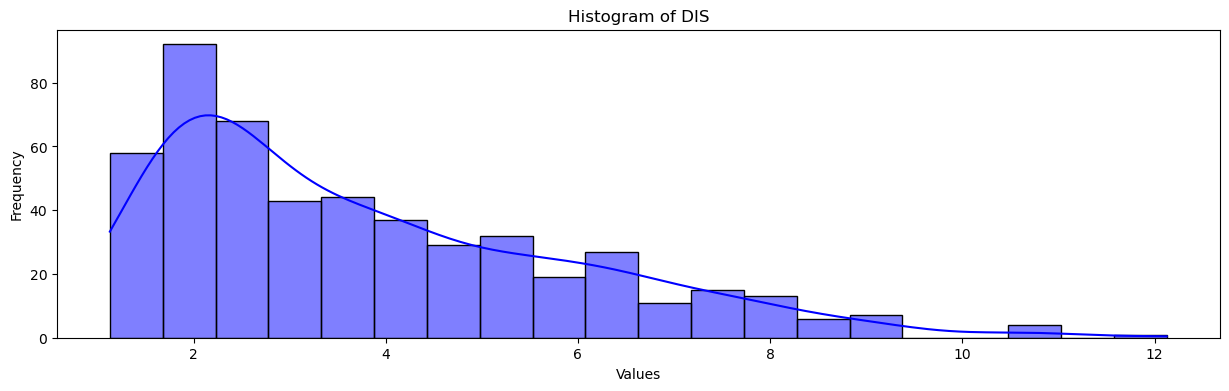

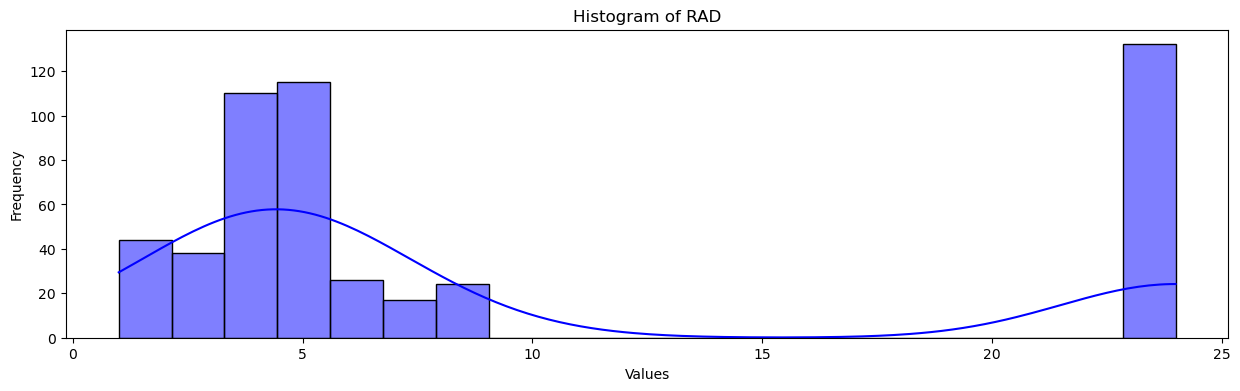

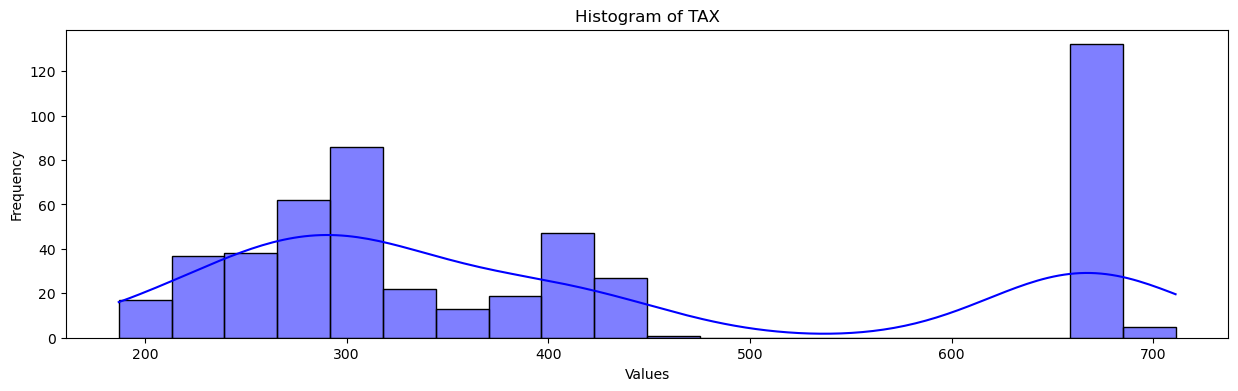

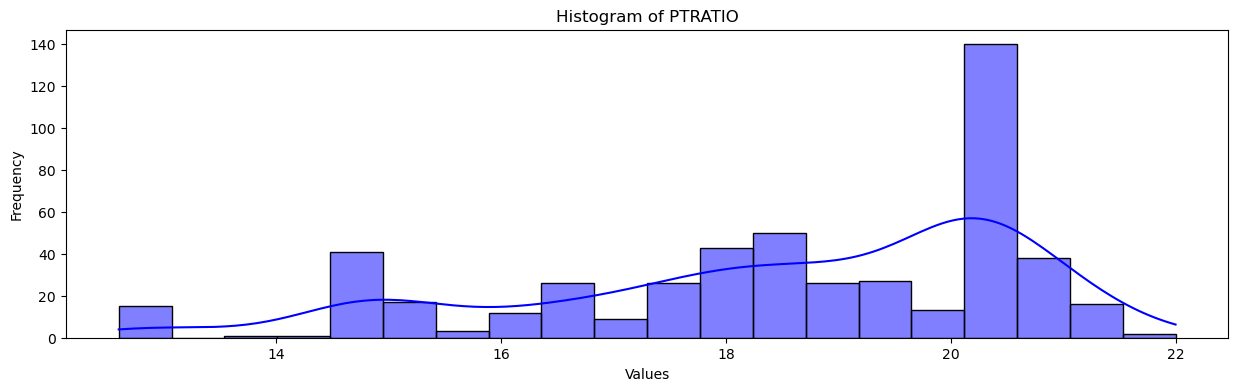

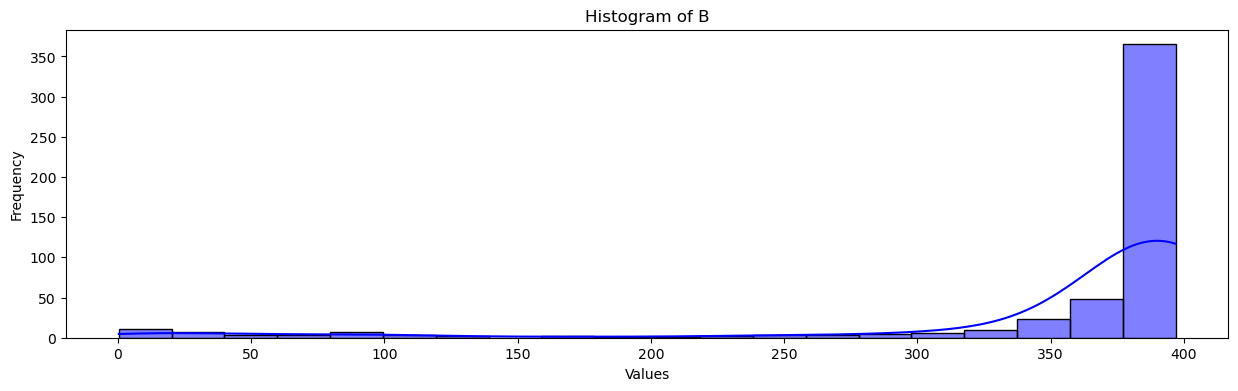

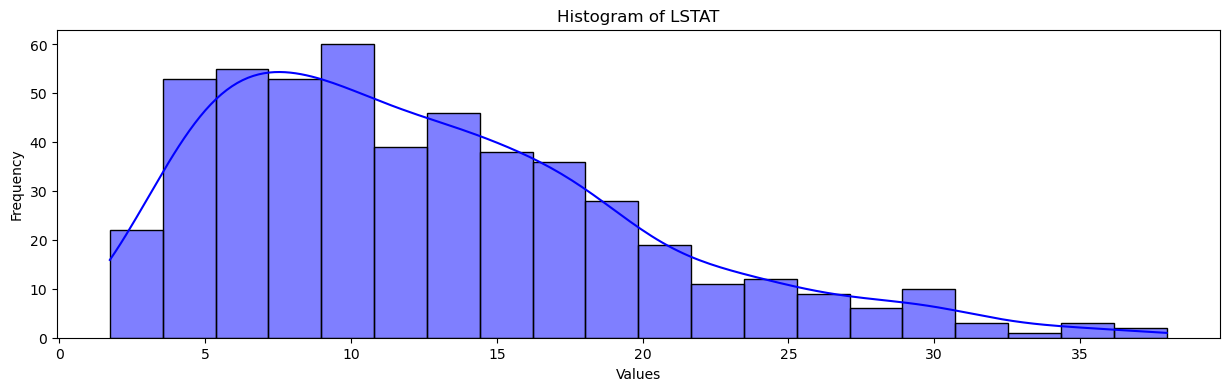

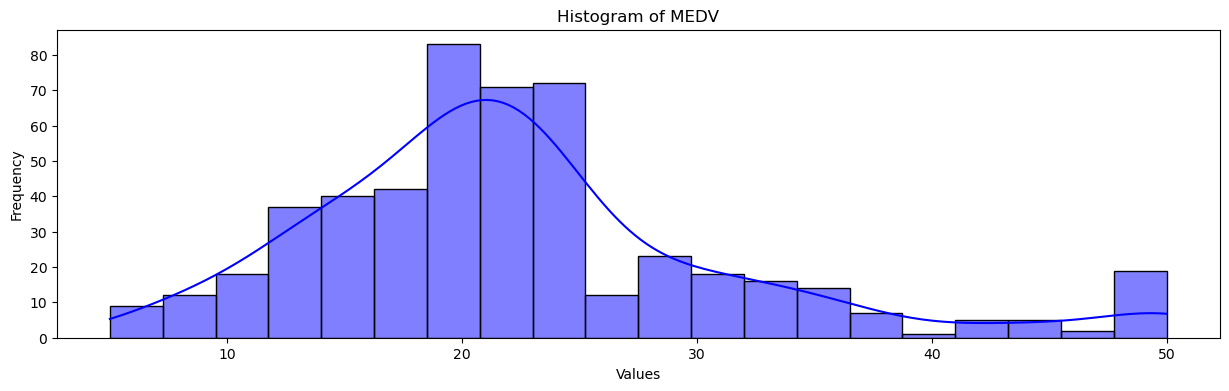

In [8]:
for col in df_filled.columns:
    plt.figure(figsize=(15,4))
    sns.histplot(df_filled[col], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

Observation:

Since none of the columns are normally distributed, using IQR method for outlier removal will delete a lot of useful data. Therefore, we can use z-score outlier removal method.

# Outlier Detection and Removal

In [9]:
from scipy import stats


# Calculate the Z-scores for each feature
z_scores = stats.zscore(df_filled)

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers based on Z-scores
outliers = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
df_no_outliers = df_filled[~outliers]

print("Original DataFrame:\n", df_filled)
print("\nDataFrame after outlier removal:\n", df_no_outliers)

Original DataFrame:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   1.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731  33.0   7.07   1.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729  33.0   7.07   1.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237  33.0   2.18   1.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905  33.0   2.18   1.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263  33.0  11.93   1.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  33.0  11.93   1.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  33.0  11.93   1.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  33.0  11.93   1.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  33.0  11.93   1.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1     

Observation:
Z-scores are used to identify and remove outliers.
After outlier removal, the dataset is reduced from 506 to 435 rows.

Insight:
Removing outliers is important for improving model accuracy and robustness, especially in regression models where extreme values can significantly affect the results.

# Feature Scaling

In [10]:
# Min-Max Scaling
def min_max_scaling(df):
    scaled_df = df.copy()
    for col in df.columns:
        min_value = df[col].min()
        max_value = df[col].max()
        scaled_df[col] = (df[col] - min_value) / (max_value - min_value)
    return scaled_df

# Z-Score Standardization
def z_score_standardization(df):
    scaled_df = df.copy()
    for col in df.columns:
        mean_value = df[col].mean()
        std_dev = df[col].std()
        scaled_df[col] = (df[col] - mean_value) / std_dev
    return scaled_df

# Apply Min-Max Scaling
df_min_max_scaled = min_max_scaling(df_no_outliers)

# Apply Z-Score Standardization
df_z_score_scaled = z_score_standardization(df_no_outliers)

# Display scaled DataFrames
print("\nMin-Max Scaled DataFrame: \n")
print(df_min_max_scaled.head())

print("\nZ-Score Standardized DataFrame: \n")
print(df_z_score_scaled.head())



Min-Max Scaled DataFrame: 

       CRIM     ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.088  0.040015   NaN  0.309129  0.550786  0.641607  0.365784   
1  0.000733  0.328  0.219706   NaN  0.165975  0.512353  0.782698  0.474158   
2  0.000732  0.328  0.219706   NaN  0.165975  0.703020  0.599382  0.474158   
3  0.000909  0.328  0.035108   NaN  0.143154  0.656351  0.441813  0.609467   
4  0.002190  0.328  0.035108   NaN  0.143154  0.693536  0.528321  0.609467   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.206501  0.280488  1.000000  0.107403  0.414414  
1  0.043478  0.103250  0.585366  1.000000  0.244878  0.360360  
2  0.043478  0.103250  0.585366  0.987015  0.076008  0.655405  
3  0.086957  0.065010  0.695122  0.992758  0.039987  0.626126  
4  0.086957  0.065010  0.695122  1.000000  0.118969  0.689189  

Z-Score Standardized DataFrame: 

       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 

Observation:
Both Min-Max Scaling and Z-Score Standardization are applied to the data.
Missing values in CHAS remain, indicating that this feature was dropped in the subsequent step.

# Removing a Feature with Missing Values

In [11]:
df_min_max_scaled.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS       435
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

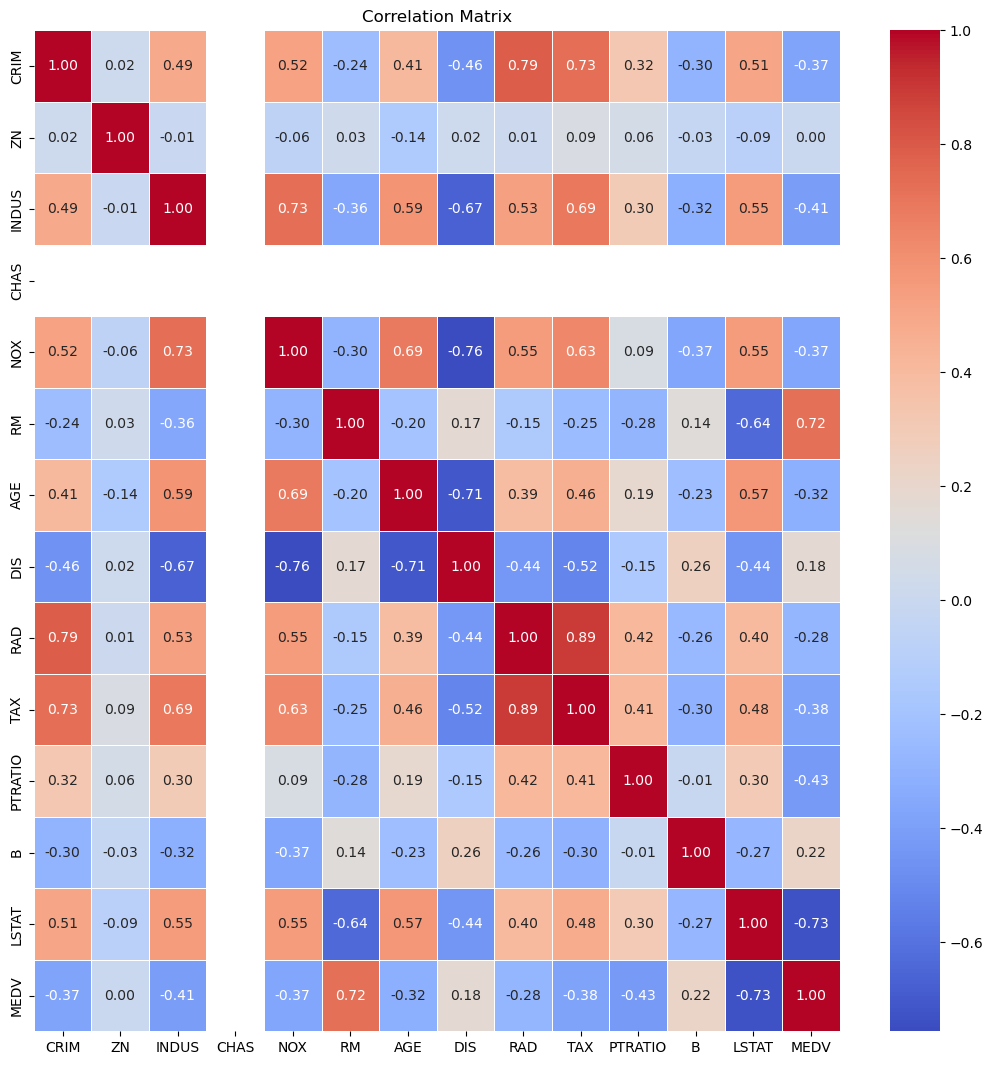

In [12]:
# Calculate and display correlation matrix
correlation_matrix = df_min_max_scaled.corr()
# Set the size of the plot
plt.figure(figsize=(13, 13))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix')
plt.show()

Observation:
We can see that CHAS and MEDV( which is the target variable) are not correlated a lot, which means CHAS doesn't affect MEDV. Therefore, we can drop that column.

In [13]:
df_new = df_min_max_scaled.drop(columns=['CHAS'])

print(df_new)

         CRIM     ZN     INDUS       NOX        RM       AGE       DIS  \
0    0.000000  0.088  0.040015  0.309129  0.550786  0.641607  0.365784   
1    0.000733  0.328  0.219706  0.165975  0.512353  0.782698  0.474158   
2    0.000732  0.328  0.219706  0.165975  0.703020  0.599382  0.474158   
3    0.000909  0.328  0.035108  0.143154  0.656351  0.441813  0.609467   
4    0.002190  0.328  0.035108  0.143154  0.693536  0.528321  0.609467   
..        ...    ...       ...       ...       ...       ...       ...   
501  0.001965  0.328  0.403171  0.381743  0.555278  0.681771  0.166681   
502  0.001360  0.328  0.403171  0.381743  0.437235  0.760041  0.143069   
503  0.001900  0.328  0.403171  0.381743  0.650861  0.907312  0.128242   
504  0.003605  0.328  0.403171  0.381743  0.605440  0.889804  0.155598   
505  0.001434  0.328  0.403171  0.381743  0.414774  0.802266  0.169943   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.000000  0.206501  0.280488  1.000000  

Observation:
Missing values in CHAS are retained even after scaling, leading to the decision to drop this column.

Insight:
Removing columns with substantial missing values or after imputation is a practical approach to ensure that the dataset is clean and ready for analysis or modeling.


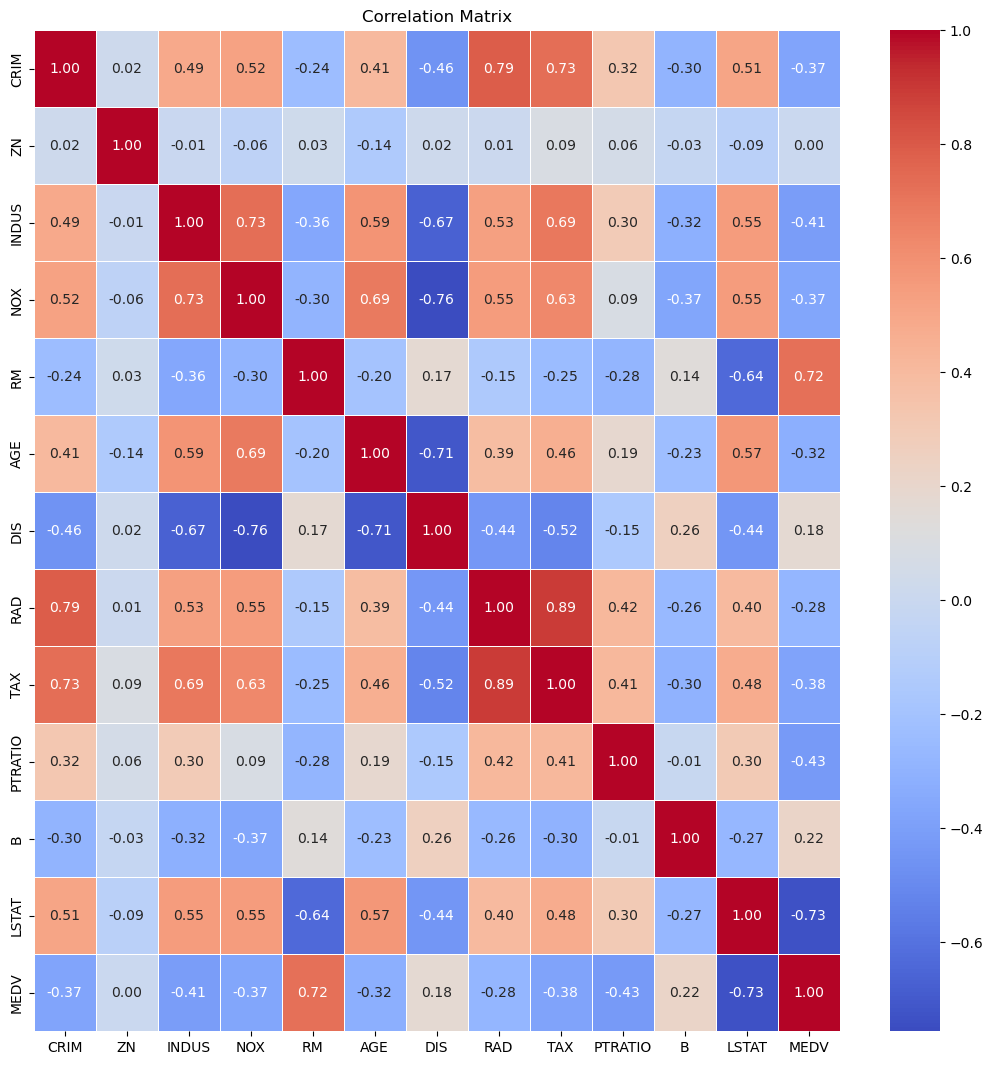

In [14]:
# Calculate and display correlation matrix
correlation_matrix = df_new.corr()
# Set the size of the plot
plt.figure(figsize=(13, 13))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix')
plt.show()

In [15]:
X = df_new .drop('MEDV',axis =1)
y = df_new['MEDV']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

In [16]:
# Checking the length of each set
print("Number of samples in training set:", len(X_train))
print("Number of samples in test set:", len(X_test))

Number of samples in training set: 348
Number of samples in test set: 87


Observations:
The dataset has been split into training and test sets with an 80-20 ratio.
The training set contains 348 samples, and the test set contains 87 samples.
The random_state=100 ensures that the split is reprodcible.

# MODEL DEVELOPMENT AND EVALUATION

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")



Model Evaluation:
Mean Absolute Error (MAE): 0.0611
Mean Squared Error (MSE): 0.0072
R^2 Score: 0.6411


Observations:
1.The Mean Absolute Error (MAE) of 0.0611 indicates that, on average, the model's predictions are off by 0.0611 units from the actual values.

2.The Mean Squared Error (MSE) of 0.0072 shows the average squared difference between the predicted and actual values.

3.The R² score of 0.6411 means that about 64.11% of the variance in MEDV is explained by the model.


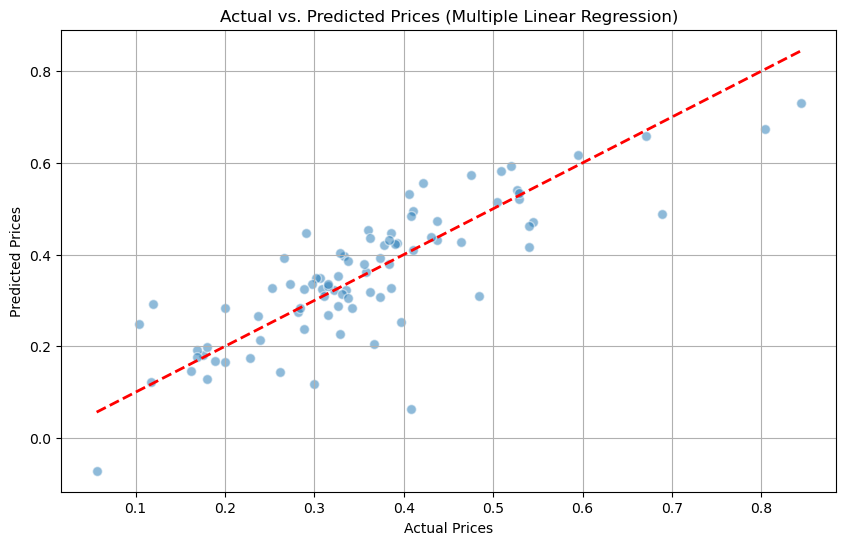

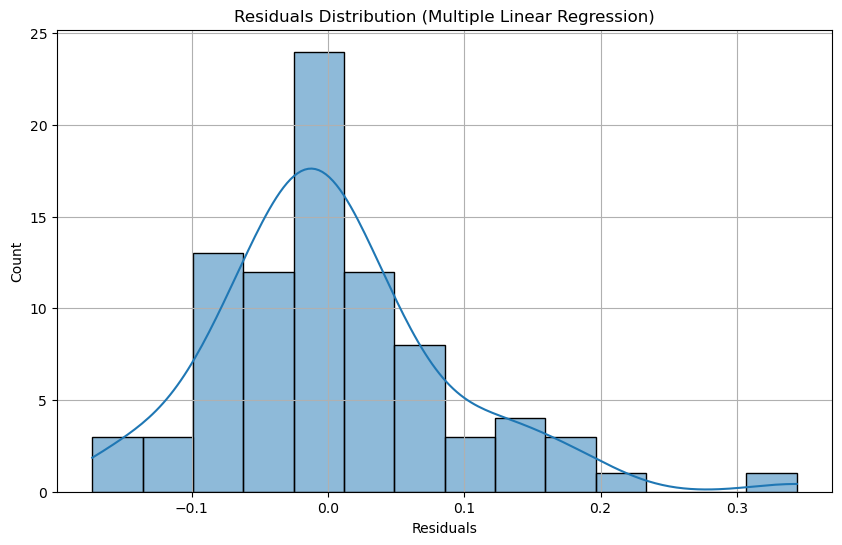

Multiple Linear Regression Coefficients:
         Coefficient  Absolute Coefficient
LSTAT      -0.429973              0.429973
RM          0.420069              0.420069
DIS        -0.228951              0.228951
PTRATIO    -0.179737              0.179737
NOX        -0.169476              0.169476
RAD         0.133029              0.133029
TAX        -0.131070              0.131070
B           0.058088              0.058088
INDUS       0.045026              0.045026
CRIM       -0.037507              0.037507
ZN         -0.033317              0.033317
AGE         0.011395              0.011395


In [19]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', s=50)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs. Predicted Prices ({model_name})')
    plt.grid(True)
    plt.show()

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution ({model_name})')
    plt.grid(True)
    plt.show()

def display_coefficients(model, X, model_name):
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)
    print(f"{model_name} Coefficients:")
    print(coefficients)


# Visualization for Multiple Linear Regression
plot_actual_vs_predicted(y_test, y_pred, 'Multiple Linear Regression')
plot_residuals(y_test, y_pred, 'Multiple Linear Regression')
display_coefficients(model, X, 'Multiple Linear Regression')

Observations:
1.The table of coefficients indicates which features have the most substantial impact on MEDV.

2.Features with higher absolute coefficients are more influential in the model.

3.LSTAT (percentage of lower status population) has the largest negative impact, while RM (average number of rooms per dwelling) has the largest positive impact.

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the lambda range
lamda = np.linspace(0, 1, 20)

# Initialize best parameters
best_lamda = 0
best_mae = float('inf')  # Initialize to a high value
best_mse = float('inf')  # Initialize to a high value
best_r2 = float('-inf')  # Initialize to a low value
best_adjr2 = float('-inf')  # Initialize to a low value

# Train and evaluate the Ridge regression model for each lambda
for param in lamda:
    RRM = Ridge(alpha=param)
    RRM.fit(X_train, y_train)

    y_pred = RRM.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1-r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    print(f"lambda = {param}")
    print(f"MAE for this lambda = {mae}")
    print(f"MSE for this lambda = {mse}")
    print(f"R² for this lambda = {r2}")
    print(f"Adjusted R² for this lambda = {adjusted_r2}")
    print("------------------")

    if mae < best_mae:
        best_mae = mae
        best_lamda = param

    if mse < best_mse:
        best_mse = mse
        best_lamda = param

    if r2 > best_r2:
        best_r2 = r2
        best_lamda = param

    if adjusted_r2 > best_adjr2:
        best_adjr2 = adjusted_r2
        best_lamda = param

print(f"Best value of lambda = {best_lamda}")
print(f"Best value of MAE for the best lambda = {best_mae}")
print(f"Best value of MSE for the best lambda = {best_mse}")
print(f"Best value of R² for the best lambda = {best_r2}")
print(f"Best value of Adjusted R² for the best lambda = {best_adjr2}")


lambda = 0.0
MAE for this lambda = 0.061109899940546254
MSE for this lambda = 0.007158960985331574
R² for this lambda = 0.6411411724670415
Adjusted R² for this lambda = 0.5829478490833184
------------------
lambda = 0.05263157894736842
MAE for this lambda = 0.060999141758916256
MSE for this lambda = 0.007130458021939607
R² for this lambda = 0.6425699468443589
Adjusted R² for this lambda = 0.5846083166029035
------------------
lambda = 0.10526315789473684
MAE for this lambda = 0.06090767205376751
MSE for this lambda = 0.007102779329013005
R² for this lambda = 0.6439574028329634
Adjusted R² for this lambda = 0.5862207654545251
------------------
lambda = 0.15789473684210525
MAE for this lambda = 0.060824177973244097
MSE for this lambda = 0.007075884060680878
R² for this lambda = 0.6453055879228986
Adjusted R² for this lambda = 0.5877875751536389
------------------
lambda = 0.21052631578947367
MAE for this lambda = 0.06075069217445718
MSE for this lambda = 0.007049735152831875
R² for this

Observations:

1.The loop output shows the evaluation metrics for each lambda.

2.The best lambda value is found to be 1.0, resulting in the lowest MAE and MSE and the highest R² and Adjusted R².

3.This indicates that a regularization strength of 1.0 provides the best model performance on the test set.

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# Setup the GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                                  scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search_ridge.fit(X_train, y_train)

# Get the best model and parameters
best_ridge_model = grid_search_ridge.best_estimator_
best_ridge_alpha = grid_search_ridge.best_params_['alpha']

# Print the best parameters
print("Best Ridge Regression Alpha:", best_ridge_alpha)


Best Ridge Regression Alpha: 1


In [22]:
# Predict with the best Ridge model
y_ridge_pred = best_ridge_model.predict(X_test)

# Evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("Tuned Ridge Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"R^2 Score: {r2_ridge:.4f}")


Tuned Ridge Regression Evaluation:
Mean Absolute Error (MAE): 0.0597
Mean Squared Error (MSE): 0.0067
R^2 Score: 0.6627


Observations:
1.The best Ridge regression model is used to make predictions on the test set.

2.The evaluation metrics (MAE, MSE, R²) are calculated for the tuned model.

3.The results show improved performance, indicating that the tuned Ridge model is more effective.

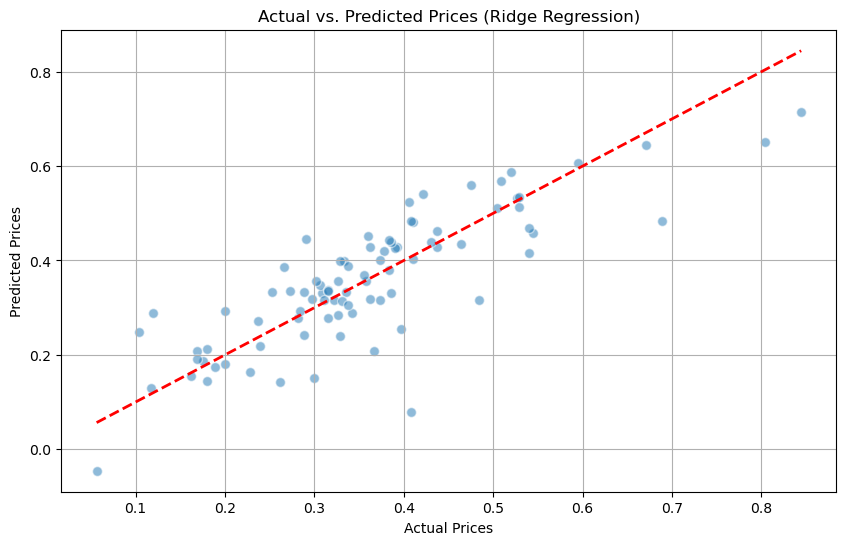

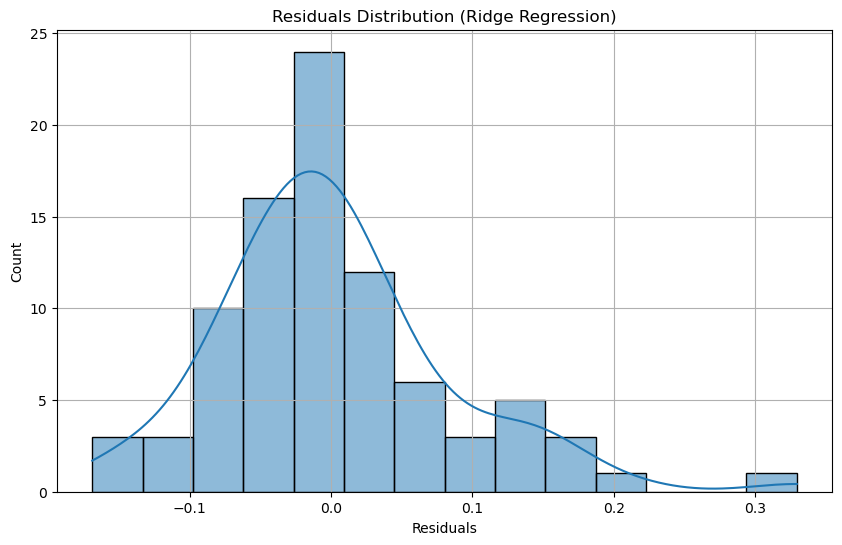

Ridge Regression Coefficients:
         Coefficient  Absolute Coefficient
LSTAT      -0.409845              0.409845
RM          0.396327              0.396327
DIS        -0.200144              0.200144
PTRATIO    -0.167115              0.167115
NOX        -0.134707              0.134707
RAD         0.102237              0.102237
TAX        -0.099028              0.099028
B           0.056438              0.056438
CRIM       -0.035833              0.035833
ZN         -0.028674              0.028674
INDUS       0.017140              0.017140
AGE         0.007109              0.007109


In [23]:
plot_actual_vs_predicted(y_test, y_ridge_pred, 'Ridge Regression')
plot_residuals(y_test, y_ridge_pred, 'Ridge Regression')
display_coefficients(best_ridge_model, X, 'Ridge Regression')

Observations:
1.The coefficients of the Ridge regression model highlight the most influential features, with LSTAT and RM being the most significant.
Regularization reduces the impact of less important features.

lambda = 0.0010
MAE for this lambda = 0.0636
MSE for this lambda = 0.0073
R² for this lambda = 0.6325
Adjusted R² for this lambda = 0.5730
------------------
lambda = 0.0064
MAE for this lambda = 0.0641
MSE for this lambda = 0.0080
R² for this lambda = 0.5999
Adjusted R² for this lambda = 0.5350
------------------
lambda = 0.0119
MAE for this lambda = 0.0762
MSE for this lambda = 0.0100
R² for this lambda = 0.4995
Adjusted R² for this lambda = 0.4183
------------------
lambda = 0.0173
MAE for this lambda = 0.0868
MSE for this lambda = 0.0124
R² for this lambda = 0.3777
Adjusted R² for this lambda = 0.2768
------------------
lambda = 0.0228
MAE for this lambda = 0.0937
MSE for this lambda = 0.0146
R² for this lambda = 0.2689
Adjusted R² for this lambda = 0.1503
------------------
lambda = 0.0282
MAE for this lambda = 0.1021
MSE for this lambda = 0.0178
R² for this lambda = 0.1061
Adjusted R² for this lambda = -0.0389
------------------
lambda = 0.0337
MAE for this lambda = 0.1096
MSE fo

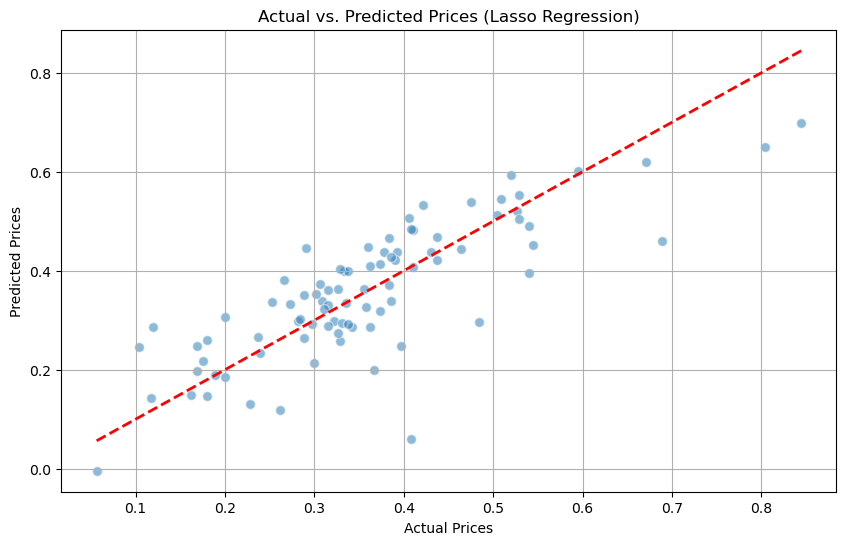

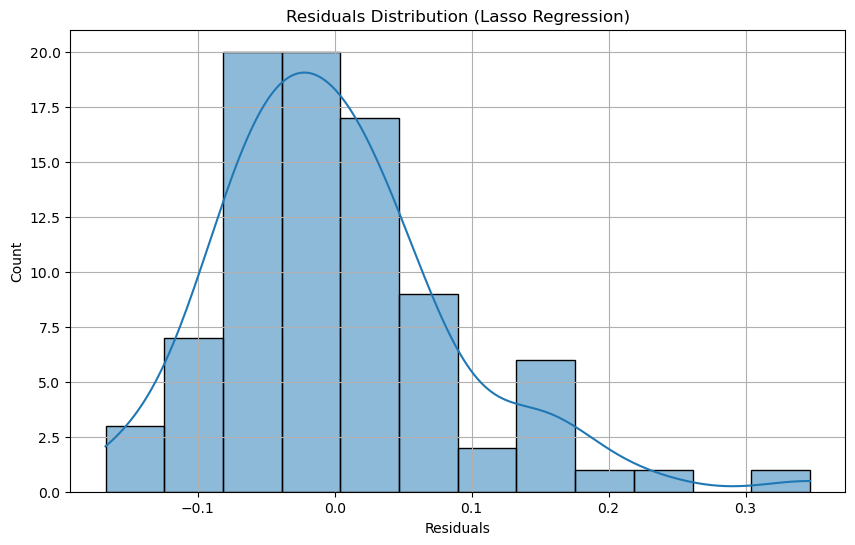

Lasso Regression Coefficients:
         Coefficient  Absolute Coefficient
RM          0.426610              0.426610
LSTAT      -0.424223              0.424223
DIS        -0.155909              0.155909
PTRATIO    -0.134393              0.134393
NOX        -0.070543              0.070543
B           0.028852              0.028852
TAX        -0.021853              0.021853
RAD         0.013211              0.013211
CRIM       -0.000000              0.000000
ZN         -0.000000              0.000000
INDUS      -0.000000              0.000000
AGE         0.000000              0.000000


In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the range of lambda (alpha) values
lambda_values = np.linspace(0.001, 0.05, 10)

# Initialize variables to store the best results
best_lambda = 0
best_mae = float('inf')  # Initialize with a large value for finding minimum
best_mse = float('inf')  # Initialize with a large value for finding minimum
best_r2 = -float('inf')   # Initialize with a large negative value for finding maximum
best_adjr2 = -float('inf') # Initialize with a large negative value for finding maximum

# Initialize lists to store metrics for plotting
mae_list = []
mse_list = []
r2_list = []
adjr2_list = []
y_test_list = []
y_pred_list = []

for param in lambda_values:
    # Create Lasso Regression model with current alpha parameter
    lasso_model = Lasso(alpha=param)
    lasso_model.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = lasso_model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Store metrics in lists
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)
    adjr2_list.append(adjusted_r2)
    
    # Store predictions and true values for plotting
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)
    
    # Print metrics for current lambda
    print(f"lambda = {param:.4f}")
    print(f"MAE for this lambda = {mae:.4f}")
    print(f"MSE for this lambda = {mse:.4f}")
    print(f"R² for this lambda = {r2:.4f}")
    print(f"Adjusted R² for this lambda = {adjusted_r2:.4f}")
    print("------------------")
    
    # Update best metrics and lambda if a better value is found
    if mae < best_mae:
        best_mae = mae
        best_lambda = param
    
    if mse < best_mse:
        best_mse = mse
        best_lambda = param
    
    if r2 > best_r2:
        best_r2 = r2
        best_lambda = param
    
    if adjusted_r2 > best_adjr2:
        best_adjr2 = adjusted_r2
        best_lambda = param

# Print the best lambda and corresponding metrics found
print(f"Best value of lambda = {best_lambda:.4f}")
print(f"Best MAE = {best_mae:.4f}")
print(f"Best MSE = {best_mse:.4f}")
print(f"Best R² = {best_r2:.4f}")
print(f"Best Adjusted R² = {best_adjr2:.4f}")

# For the best lambda, use the corresponding model for visualizations
best_lasso_model = Lasso(alpha=best_lambda)
best_lasso_model.fit(X_train, y_train)
y_best_lasso_pred = best_lasso_model.predict(X_test)

# Visualizations for the best Lasso model
plot_actual_vs_predicted(y_test, y_best_lasso_pred, 'Lasso Regression')
plot_residuals(y_test, y_best_lasso_pred, 'Lasso Regression')
display_coefficients(best_lasso_model, X_train, 'Lasso Regression')


Observations:

1.Parameter Tuning and Model Evaluation:
The analysis was conducted using Lasso regression, testing a range of lambda (alpha) values between 0.001 and 0.05. Below are the key results and insights:
Lambda Value Testing:
Lambda (0.0010):
MAE: 0.0636
MSE: 0.0073
R²: 0.6325
Adjusted R²: 0.5730
**As lambda increased, the performance metrics (MAE, MSE, R², Adjusted R²) deteriorated, indicating that the best lambda was at the lower end of the tested range.

2.Best Model Performance:
The best Lasso model was found with a lambda of 0.0010:
MAE: 0.0636
MSE: 0.0073
R²: 0.6325
Adjusted R²: 0.5730


3.Visualizations and Coefficient Analysis:

Actual vs. Predicted Plot
This plot provides a visual comparison between the actual and predicted values for the best Lasso model, showcasing the model's performance.

Residuals Plot
The residuals plot helps in identifying any patterns in the residuals which would indicate a potential issue with the model fit. For the Lasso regression, the residuals appeared to be randomly dispersed around the horizontal axis, indicating a good fit.

Coefficient analysis:
The RM (average number of rooms per dwelling) and LSTAT (percentage of lower status of the population) were the most significant predictors.
Features like CRIM, ZN, INDUS, and AGE had no influence on the prediction, as indicated by their zero coefficients.

### Conclusion: Best and Worst Performance of All Algorithms

Overview
The model evaluation was conducted using three different regression algorithms:
Linear Regression
Ridge Regression
Lasso Regression


The performance of each algorithm was evaluated based on the following metrics:
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
R-squared (R²)
Adjusted R-squared (Adjusted R²)


Summary of Results:

Linear Regression
MAE: 0.0610
MSE: 0.0072
R²: 0.6435
Adjusted R²: 0.5856

Ridge Regression
Best Lambda: 1.0
MAE: 0.0597
MSE: 0.0067
R²: 0.6627
Adjusted R²: 0.6080

Lasso Regression
Best Lambda: 0.0010
MAE: 0.0636
MSE: 0.0073
R²: 0.6325
Adjusted R²: 0.5730

Best Performance
Ridge Regression demonstrated the best performance with the following metrics:
MAE: 0.0597 (Lowest among the three algorithms)
MSE: 0.0067 (Lowest among the three algorithms)
R²: 0.6627 (Highest among the three algorithms)
Adjusted R²: 0.6080 (Highest among the three algorithms)
Ridge Regression with a lambda of 1.0 provided the best balance between bias and variance, indicating a robust model with the best overall performance.

Worst Performance
Lasso Regression demonstrated the worst performance with the following metrics:
MAE: 0.0636 (Highest among the three algorithms)
MSE: 0.0073 (Highest among the three algorithms)
R²: 0.6325 (Lowest among the three algorithms)
Adjusted R²: 0.5730 (Lowest among the three algorithms)
Lasso Regression with a lambda of 0.0010 had the highest errors and the lowest R² values, making it the least effective model for this dataset.

Conclusion
In this analysis:
Ridge Regression emerged as the most effective algorithm, providing the best predictive performance.
Lasso Regression showed the weakest performance among the three models.
Linear Regression performed moderately well, but not as effectively as Ridge Regression.